In [1]:
import pandas as pd
import numpy as np

# 数据读取

In [2]:
df = pd.read_csv(r'C:/Users/Kismet/Documents/我的坚果云/data_mining20170318/DAY567/第七节课-模型评估与实现/adultTest.csv',engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [4]:
df_new = pd.get_dummies(data = df,columns=['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country'])
X = df_new.drop('class',axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_new['class'] = df_new['class'].str.strip()

In [6]:
df_new.loc[df_new['class']=='<=50K','label']=0
df_new.loc[df_new['class']!='<=50K','label']=1
df_new['label'].value_counts()

0.0    24720
1.0     7841
Name: label, dtype: int64

In [7]:
y = df_new['label']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [8]:
X.fillna(0,inplace=True)

# 数据集切分

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
trainX,testX,trainY,testY = train_test_split(X,y,train_size=0.7)

# 模型构建

In [11]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

0.79905824547036541

In [12]:
proba = lr.predict_proba(testX)[:,1]

# 模型评估

In [13]:
from sklearn.metrics import precision_recall_curve,classification_report,roc_auc_score

In [14]:
precision,recall,thresholds = precision_recall_curve(testY,proba)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

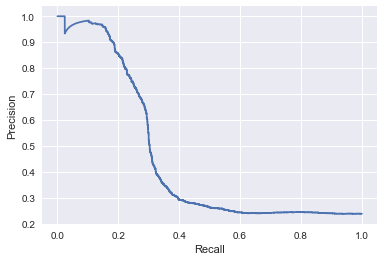

In [16]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [17]:
print(classification_report(testY,lr.predict(testX)))

             precision    recall  f1-score   support

        0.0       0.81      0.97      0.88      7448
        1.0       0.71      0.26      0.38      2321

avg / total       0.78      0.80      0.76      9769



In [18]:
roc_auc_score(testY,proba)

0.5745698685379047

# 归一化

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(trainX)
trainX_std = std.transform(trainX)
testX_std = std.transform(testX)

In [20]:
lr1 = LogisticRegression()
lr1.fit(trainX_std,trainY)
lr1.score(testX_std,testY)

0.8499334629951889

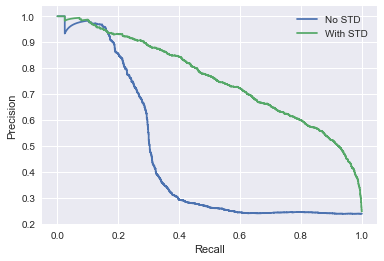

In [21]:
proba1 = lr1.predict_proba(testX_std)[:,1]
precision1,recall1,thresholds1 = precision_recall_curve(testY,proba1)
plt.plot(recall,precision,label='No STD')
plt.plot(recall1,precision1,label='With STD')
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")

In [22]:
print(classification_report(testY,lr1.predict(testX_std)))

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90      7448
        1.0       0.72      0.60      0.66      2321

avg / total       0.84      0.85      0.85      9769



In [23]:
roc_auc_score(testY,proba1)

0.90419752449382207

# 交叉验证

In [30]:
from sklearn.grid_search import GridSearchCV
param = {'C':[0.001,0.1,1,10],'max_iter':[100,200]}
lr = LogisticRegression()
clf = GridSearchCV(lr,param,cv=3,n_jobs=-1,verbose=1,scoring='roc_auc')
clf.fit(trainX_std,trainY)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   15.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.1, 1, 10], 'max_iter': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [31]:
clf.grid_scores_

[mean: 0.89879, std: 0.00125, params: {'C': 0.001, 'max_iter': 100},
 mean: 0.89879, std: 0.00125, params: {'C': 0.001, 'max_iter': 200},
 mean: 0.90692, std: 0.00062, params: {'C': 0.1, 'max_iter': 100},
 mean: 0.90692, std: 0.00062, params: {'C': 0.1, 'max_iter': 200},
 mean: 0.90666, std: 0.00076, params: {'C': 1, 'max_iter': 100},
 mean: 0.90666, std: 0.00076, params: {'C': 1, 'max_iter': 200},
 mean: 0.90644, std: 0.00090, params: {'C': 10, 'max_iter': 100},
 mean: 0.90644, std: 0.00090, params: {'C': 10, 'max_iter': 200}]

In [32]:
clf.best_params_

{'C': 0.1, 'max_iter': 100}

# SVM

In [33]:
from sklearn.svm import LinearSVC

In [34]:
lsvc = LinearSVC()
param = {'C':[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsvc,param,cv=5,n_jobs=-1,verbose=1,scoring='roc_auc')
clf.fit(trainX_std,trainY)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=1)

In [35]:
clf.grid_scores_

[mean: 0.90559, std: 0.00170, params: {'C': 0.001},
 mean: 0.90671, std: 0.00186, params: {'C': 0.01},
 mean: 0.90679, std: 0.00195, params: {'C': 0.1},
 mean: 0.90500, std: 0.00228, params: {'C': 1}]

In [36]:
clf.best_params_

{'C': 0.1}

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()              #用的不是梯度下降，是信息熵，不需要标准化
rf.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
roc_auc_score(testY,rf.predict_proba(testX)[:,1])

0.87626527118251096

In [40]:
rf = RandomForestClassifier(n_estimators=150,max_depth=5)              #比起调参，特征工程更重要
rf.fit(trainX,trainY)
roc_auc_score(testY,rf.predict_proba(testX)[:,1])

0.89572091620384742

# 无监督模型

In [41]:
from sklearn.cluster import KMeans

In [43]:
km = KMeans(n_clusters=10)
km.fit(trainX_std,trainY)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
km.cluster_centers_

array([[-0.24333056,  0.53956662, -0.58171293, ..., -2.95426802,
        -0.0459396 , -0.02095097],
       [-0.2399    ,  0.06372567,  0.07928912, ..., -0.0249421 ,
         0.03444976, -0.0121521 ],
       [-1.01659953,  0.04460469, -0.23051292, ...,  0.1091362 ,
        -0.00373324,  0.00984648],
       ..., 
       [ 0.29471007,  0.01344229, -0.58821314, ..., -2.95426802,
        -0.0459396 , -0.02095097],
       [-0.13603659, -0.22733841,  0.27759357, ..., -2.95426802,
        -0.0459396 , -0.02095097],
       [ 0.3890874 , -0.05922154,  0.06894227, ..., -2.95426802,
        -0.0459396 , -0.02095097]])

In [45]:
km.transform(testX_std)

array([[ 48.26719069,   4.36937083,   5.55545762, ...,  44.19333667,
         21.26741052,  24.49081927],
       [ 52.08036498,  21.18149976,  21.37186876, ...,  48.47974332,
         28.97906512,  31.46275876],
       [ 48.86672169,   9.78857989,   9.84369731, ...,  44.59449677,
         22.37844108,  25.57362931],
       ..., 
       [ 48.63647954,   8.04919008,   8.80935464, ...,  44.61144569,
         21.80633957,  24.9064124 ],
       [ 48.39778596,   6.54682101,   6.83991703, ...,  44.36683785,
         21.40519252,  24.48441612],
       [ 48.87455347,   9.70950358,  10.12445472, ...,  44.68213045,
         22.37803129,  25.84625794]])

In [46]:
km.predict(testX_std)

array([1, 6, 4, ..., 4, 4, 5])